In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Fetch Dataset and Removing Missing Values

In [3]:
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets
z= y.copy()
z['num'] = np.where(y['num'] != 0, 1, 0)

heartDisease_combined = pd.concat([X,z], axis=1) # combines labels and features into one DF
heartDisease_combined.head()

# Splitting into continuous and categorical variables
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [4]:
# Printing summary stats of each column
heartDisease_combined.describe(include='all')

# Observations:
# 25% of patients are 61 years old or older
# Missing data found in 'ca' and 'thal', in accordance with documentation
# For 'cp', 3 indicates no symptoms. Note that most people do not experience chest pain from angina (mean 3.16)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [5]:
#removing missing values
heartDisease_combined.dropna(axis=0, inplace=True) # drops rows of original dataframe containing NaN values

print(" ")
print("Checking if cleaned dataset contains missing values")
print(heartDisease_combined.isnull().mean())

 
Checking if cleaned dataset contains missing values
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


### Correlation between features 

Text(0.5, 1.0, 'Correlation Heatmap')

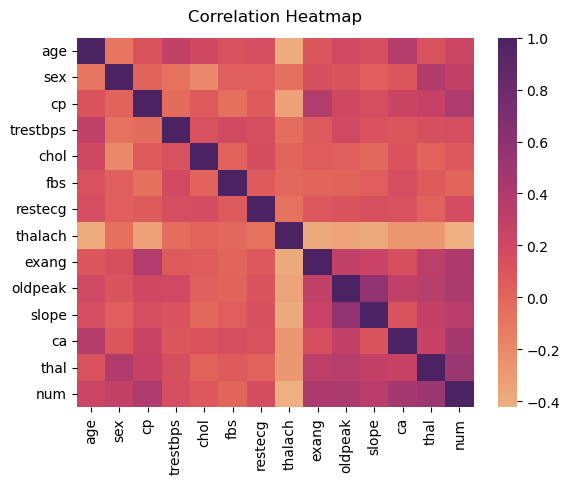

In [6]:
#Printing correlation heatmap, note that darker colours means highly correlated, lighter = not very correlated
corrHeatmap = sns.heatmap(heartDisease_combined.corr(), cmap='flare');
# add annot=True for values, but looks very messy

corrHeatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# cp exang oldpeak slope ca thal 

In [7]:
#printing correlation values
heartDisease_combined.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


### Understanding outliers 
#### Outliers are not removed or imputed since this step was not required to achieve the optimal accuracy for the Random Forest model. However, the code for identifying outliers is written here since it allowed us to understand the dataset better. 

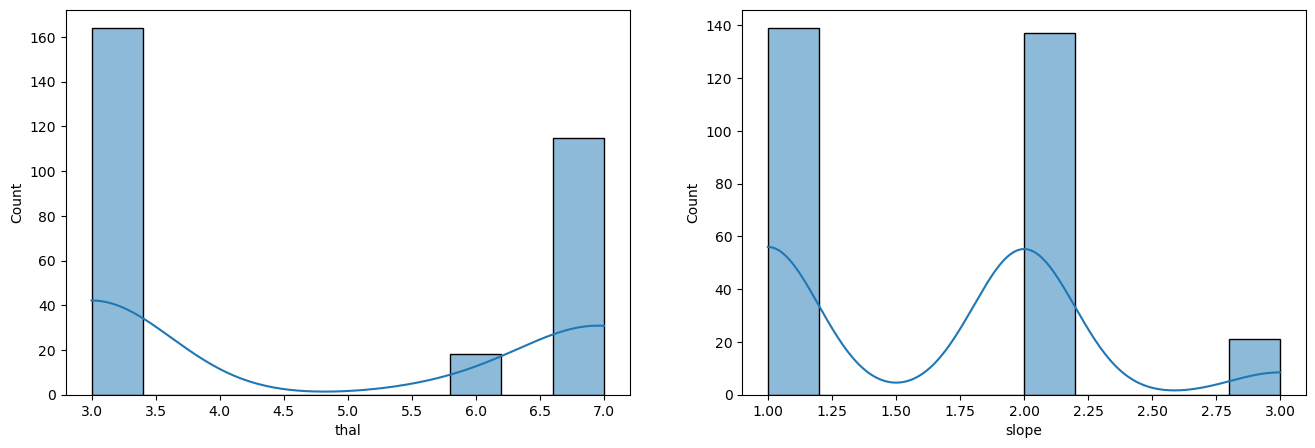

In [8]:
#plotting bar graph 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(heartDisease_combined['thal'], kde=True)

plt.subplot(1,2,2)
sns.histplot(heartDisease_combined['slope'], kde=True)

plt.show()

<Axes: >

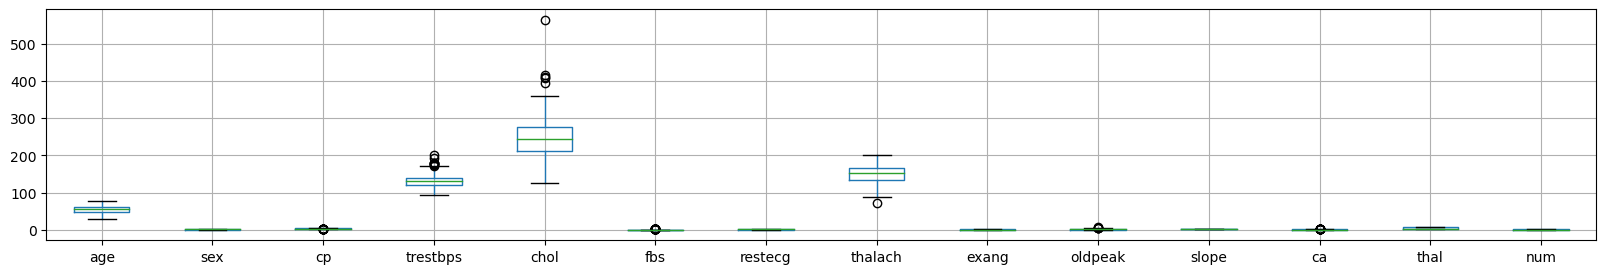

In [9]:
import numpy as np
heartDisease_combined.boxplot(figsize=(20,3))
#chol has abnormally high value

### Random Forest Model

In [10]:
X = heartDisease_combined.drop('num',axis=1)
# Putting response variable to y
y = heartDisease_combined['num']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the classification report 
from sklearn.metrics import classification_report

# Assuming y_test contains the actual labels and y_pred contains the predicted labels
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)



Accuracy: 0.8833333333333333
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



### Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
# Example true labels and predicted labels (replace with your actual data)
true_labels = y_test
predicted_labels = y_pred
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Print confusion matrixprint("Confusion Matrix:")
print(cm)

[[32  4]
 [ 3 21]]


### Feature importance scores

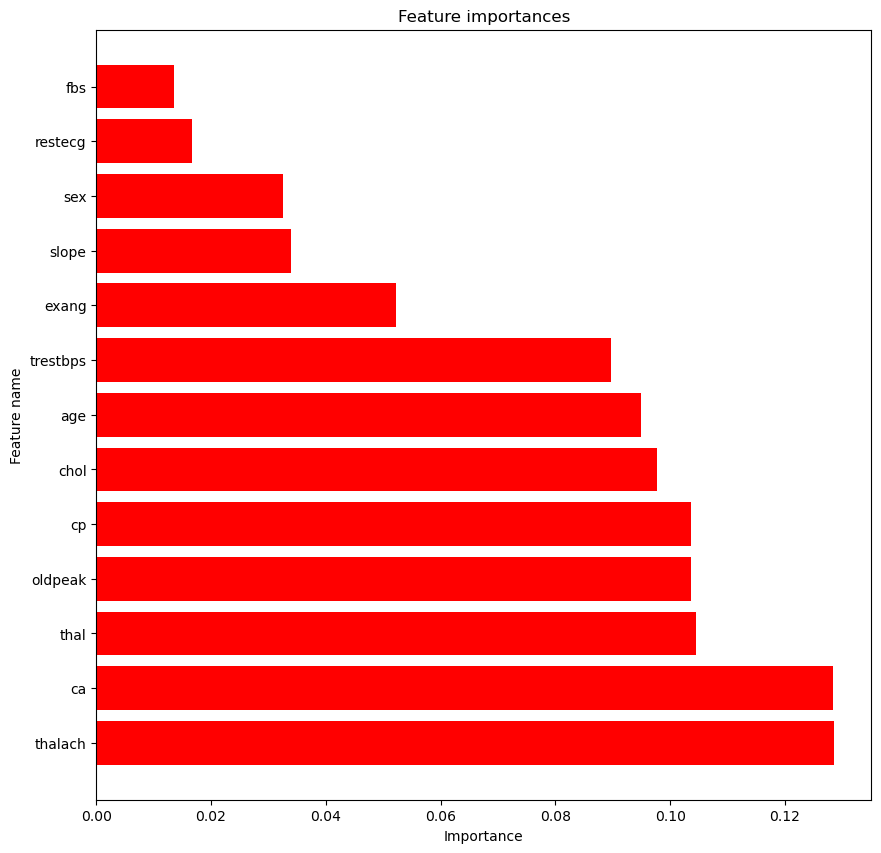

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained RandomForestClassifier named rf_classifier
# Assuming X is your feature matrix, and y is your target variable
# Assuming your dataset is stored in a pandas DataFrame named df

# Get column names of the dataset except the target variable
feature_names = heartDisease_combined.columns[heartDisease_combined.columns != 'num']

# Extract feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances horizontally
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="r", align="center")  # Notice the barh function
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # Use feature names for y-axis ticks
plt.xlabel('Importance')  # Adding a label for x-axis
plt.ylabel('Feature name')  # Adding a label for y-axis
plt.gca().invert_yaxis()  # Invert y-axis to have highest importance at the top
plt.show()


